# Tensorflow classification problem 

* Binary classification problem: It is either 0 or 1.
* Multiclass classification problem: It can be a sushi, steak or Pizza.
* Multilabel Binary classification problem : Given a piece of documentation, what are all the tags that can be created. ( the sum of the probabilty of the output need not add upto 1)


# Interview Questions 

1. Difference between multilabel , multiclass classification problem?
2. What would be the type of activation function that you would choose if you were to build a deep learning model for predicting the output of a quadratic function?
3. 


# Architecture of classification model 


## Binary classification problem 

* Input layer shape - same as the input layer sahpe 
* Hidden layer shape - Problem specific 
* Neurons per hidden layer- problem specific 
* Output layer shape - 1
* Hidden activation - RELU usually 
* Output activation - Sigmoid 
* Loss function - Cross entropy 
* Optimizer - SGD , Adam 

## Multi-Class classification problem 

* Input layer shape - same as the input layer sahpe 
* Hidden layer shape - Problem specific 
* Neurons per hidden layer- problem specific 
* Output layer shape - output number of class 
* Hidden activation - RELU usually 
* Output activation - Softmax
* Loss function - Cross entropy 
* Optimizer - SGD , Adam 



   ### creating data to view and fit 

In [ ]:
from sklearn.datasets import make_circles 


# Make 1000 examples 

n_samples=1000

# create circles 
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Visualise our data to get a better understanding of the data 

In [ ]:
import pandas as pd

circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


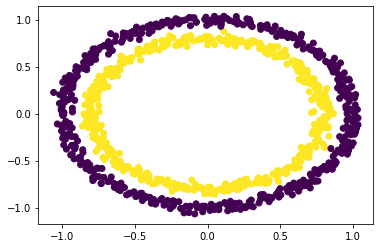

In [ ]:
# Visualize it with a plot 
import matplotlib.pyplot as plt 
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
# From the data we understand that we can create a classification problem , that helps us classify if the given co-ordinate is in the inner circle or outer circle 

## Input and Output Shapes 

In [ ]:
# Check the shape of features and labels 
X.shape ,y.shape 

((1000, 2), (1000,))

In [ ]:
import numpy as np
np.unique(y,return_counts=True )

(array([0, 1]), array([500, 500]))

# Spilt the data into test train split 

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)



In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_train=tf.constant(X_train)
y_train=tf.constant(y_train)
X_test=tf.constant(X_test)
y_test=tf.constant(y_test)

# Steps in Modelling 

1. create or import the moodel 
2. Complile the model 
3. Fit the model
4. Evaluate the model 

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

tf.random.set_seed(42)

# 1. create the model
model =tf.keras.Sequential([
                            #tf.keras.Input(shape=(,2)),
                            tf.keras.layers.Dense(100,activation ='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')
                            
                            ])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy']
              )

# 3. Fit the model 
history=model.fit(X_train,y_train,epochs=100,verbose=0,callbacks=[callback])


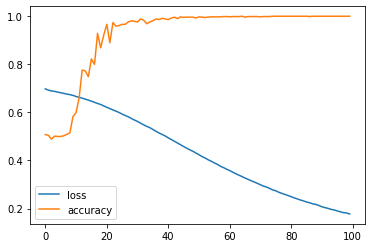

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 1.0000


[0.219013512134552, 1.0]

## Scenario 1 

Test the model when you dont split the test and train dataset

In [ ]:
# model 1 testing

tf.random.set_seed(42)

# 1. Build the model

model_1=tf.keras.Sequential([ tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(1),
                             ])

# 2. Compile the model 

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. fit the model 
history_1=model_1.fit(X_train,y_train,epochs=200,verbose=0)

In [ ]:
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4800


[0.6941307187080383, 0.47999998927116394]

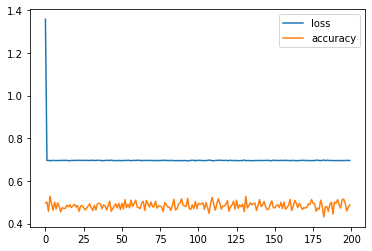

In [ ]:
pd.DataFrame(history_1.history).plot()

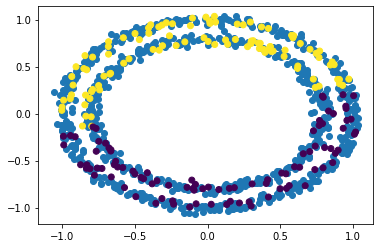

In [ ]:
# let's plot the predictions 
y_pred=model_1.predict(X_test)
y_pred=tf.squeeze(tf.constant(y_pred,dtype=tf.float32))

plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(X_test[:,0],X_test[:,1],c=np.round(y_pred))

# Result visualizing function 

* inputs are trained models , X and y
* Create a meshgrid for different values of X
* Make predictins across the meshgrid 
* Plot the predictions as well as a line between the zones ( where each unique class falls)

In [ ]:
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model prediction on X
  """
  # Define the axis boundaries of the plot and create a meshgrid 
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1 ,X[:,1].max()+0.1

  # now define the xx and yy (the meshgrid )
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  
  # create X value (w ewill make predictions on these)
  x_in=np.c_[xx.ravel(),yy.ravel()]# stack 2D arrays 

  # make predictions 
  y_pred=model.predict(x_in)

  # Check for multiclass 
  if len(y_pred[0])>1:
    print(' A multi-class classification is done')
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print(" A binary classification is done")
    y_pred=np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary 
  plt.contourf(xx,yy,y_pred)
  plt.scatter(X[:,0],X[:,1],c=y,s=40)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())




 A binary classification is done


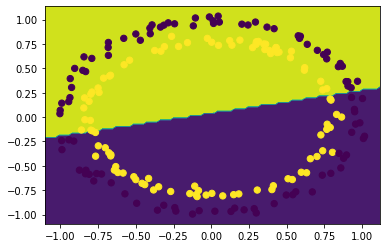

In [ ]:
plot_decision_boundary(model_1,X_test.numpy(),y_test.numpy())

## Try to fit the model for the regression problem 

In [ ]:
## lets set the ransom state 
tf.random.set_seed(42)

# Cretae some regression data 
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)


# Split the regression into training and test 
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

# Fit the model to the regression data 

model_1.fit(X_reg_train,y_reg_train,epochs=50)

Epoch 1/50


ValueError: ignored

## Model error 


The model error is caused due to the error in the loss fuunction described.

In [ ]:
# model 1 testing

tf.random.set_seed(42)

# 1. Build the model

model_2=tf.keras.Sequential([ tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
                             ])

# 2. Compile the model 

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. fit the model 
history_2=model_2.fit(X_reg_train,y_reg_train,epochs=100,verbose=0)

In [ ]:
pd.DataFrame(history_2.history).plot()

In [ ]:
y_reg_pred=model_2.predict(X_reg_test)

# Lets plot the results 
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='r',label='training data')
plt.scatter(X_reg_test,y_reg_test,c='y',label='testing data')
plt.scatter(X_reg_test,y_reg_pred,c='g',label='prediction data')
plt.legend()
plt.show()

## Non-Linearity 

 Will learn more about non-linearity 

 Firstly we shall try to create a simple neural network with a linear activation function. 

In [ ]:
# Set the random seed 
tf.random.set_seed(42)

# 1. create the model 

model_3=tf.keras.Sequential([tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)])

# 2. compile

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Model fit 

history_3=model_3.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X_test,y_test)

In [ ]:
# ater playing in the tensorflow playground , it was observed that 3 hidden neurons did the trick 
tf.random.set_seed(42)

# Callback
Early_stop=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5)

# 1. build the model 
model_4 =tf.keras.Sequential([tf.keras.layers.Dense(3,activation='relu'),
                              tf.keras.layers.Dense(1)])

# 2. compile model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model

history_4=model_4.fit(X_train,y_train,epochs=5000,verbose=0,callbacks=[Early_stop])

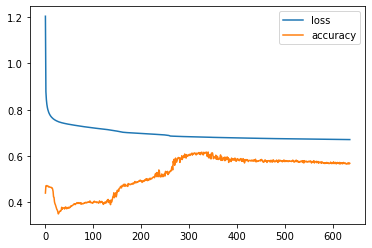

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
model_4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5200


[0.6793437004089355, 0.5199999809265137]

In [ ]:
X_train

<tf.Tensor: shape=(800, 2), dtype=float64, numpy=
array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       ...,
       [ 0.01574478, -1.02998534],
       [ 1.01102578,  0.16802846],
       [ 0.55778227, -0.57087612]])>

 A binary classification is done


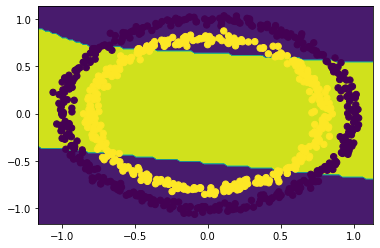

In [ ]:
plot_decision_boundary(model_4,X_train.numpy(),y_train.numpy())

# The Missing piece is the output activation

In [ ]:
tf.random.set_seed(42)



# 1. Create the model 
model_5=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

# 2. compile 

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 3. fit the model 
history_5=model_5.fit(X_train,y_train,epochs=400,callbacks=[Early_stop],verbose=0)

In [ ]:
# Evaluate the model 
model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.9200


[0.3993399441242218, 0.9200000166893005]

 A binary classification is done


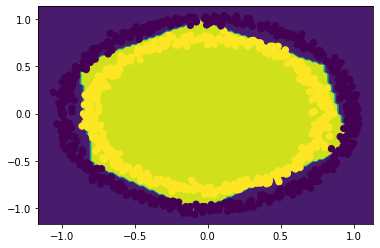

In [ ]:
plot_decision_boundary(model_5,X,y)

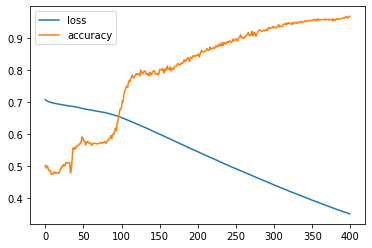

In [ ]:
# Visualize the loss decreasing 
pd.DataFrame(history_5.history).plot()

# How to pick up the ideal learning rate at the beginning 

To find the ideal learning rate (the learnuing rate where the loss decreases the most during training ) 

1. A learning rate call back  
2. Another model 
3. modified loss curve plot 

In [ ]:
# set random seed

tf.random.set_seed(42)

# create a learning rate callback 
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.0001 * 10**(epoch/20))

# 1. Build model 
model_6=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4, activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

# 2. Compile model 
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit model 
history_6=model_6.fit(X_train,y_train,verbose=0,epochs=100,callbacks=[lr_scheduler])  

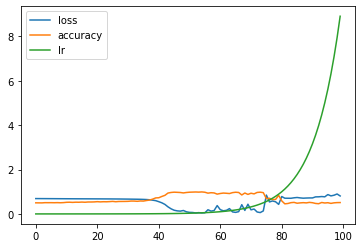

In [ ]:
# check the hisotry 
pd.DataFrame(history_6.history).plot()

Text(0.5, 1.0, 'Learning rate vs loss')

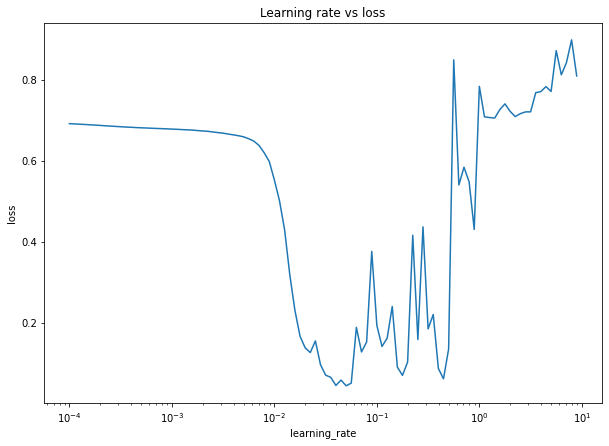

In [ ]:
# plot the learning rate vs the loss 
lrs=0.0001*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_6.history["loss"])
plt.xlabel("learning_rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")


In [ ]:
## the ideal learning rate lies somewhere in the range where the curve falls and it is typically 10 times smaller than it 

## Classification evaluation methods


Metrics used to evaluate classification metrics 

Accuracy = TP+TN\(TP+TN+Fp+FN)

precision= tp/tp+fp

recall= tp/tp+fn

F1- score= 2*(precision * recall)/(precision+recall)

Along with visualising the model results there are other model evaluation metrics.


 

In [ ]:
# Check the accuracy for our model 

loss, accuracy =model_5.evaluate(X_test,y_test)

print('the accuracy of the model_6 is :' ,{accuracy})
print('the loss of the model on the test dataset is :', {loss})


7/7 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.9200
the accuracy of the model_6 is : {0.9200000166893005}
the loss of the model on the test dataset is : {0.3993399441242218}


# Confusion matrix



In [ ]:
from sklearn.metrics import confusion_matrix


# Make predictions 

y_preds=model_5.predict(X_test)

# Plot the confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))

NameError: ignored

### how can we prettify our confusion matrix

In [ ]:
import itertools 

figsize=(10,10)

# Create consfusion matrix 
cm =confusion_matrix(y_true,tf.round(y_preds))

cm_norm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]# normalize our consfusion matrix 

# lets prettify it 
fig,ax=plt.subplots(figsize=figsize)

cax=ax.matshow(cm)

# create classes 

classes=False 

if classes:
  labels=classes
else : 
  labels=np.arange(cm.shape[0])

# label the axes 
ax.set(title='confusion matrix',
       xlabel='predicted label',
       y_label='True label'
       )



NameError: ignored

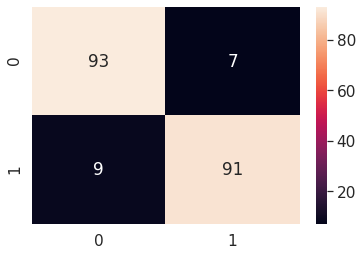

In [ ]:
import seaborn as sns 

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm,annot=True) # font size


In [ ]:

df_cm

,True,pred
0,1,1.0
1,0,0.0
2,1,1.0
3,0,0.0
4,1,0.0
...,...,...
195,0,0.0
196,1,1.0
197,0,0.0
198,1,1.0


## Working with a larger example 

Lets create a multiclass classification (More than 2 classes ). 

We are going to build a classifier to classify different clothing item.



In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first training data 
print(f"training sample:\n:{train_data[0]}\n")
print(f"training label :\n: {train_labels[0]}\n")

training sample:
:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example 
train_data[0].shape, train_labels[0].shape 

((28, 28), ())

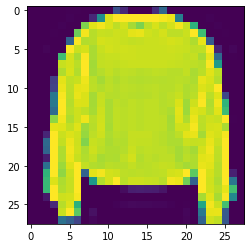

In [ ]:
# plot single sample 
import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [ ]:
# create a small list , so that we can relate to it 
class_names =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Sandal')

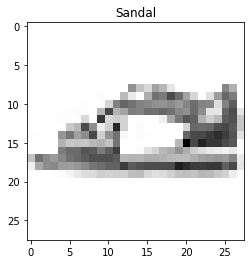

In [ ]:
index=13
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

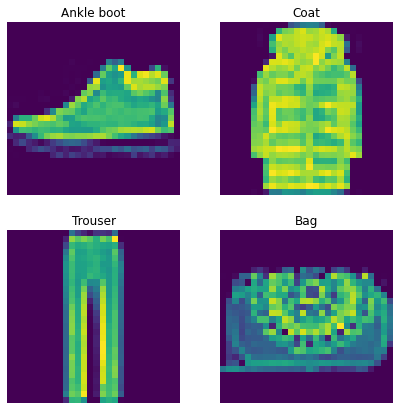

In [ ]:
# Plot multiple random images of fashion MNIST 
import random 

plt.figure(figsize=(7,7))

for i in range(4):
  ax=plt.subplot(2,2 ,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

###Building a multiclassification model

1. Input shape =28*28 ( the shape of one image) The flatten layer is to be added.
2.Output shape=10 (one per class of clothing)
3. Loss function = tf.keras.losses.CategoricalCrossentropy()
  *if your labels are one hot encoded 
  else:
  * Use tf.keras.losses.SparseCategoricalCrossEntropy()
3. Output layer activation function = Softmax (not sigmoid) 

In [ ]:
# set the seed 

tf.random.set_seed(42)

#1. build the model 

model =tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(300,activation='relu'),
                            tf.keras.layers.Dense(200,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])

# 2. compile the model 
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

#3. fit the model 
not_norm_history=model.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3378 - accuracy: 0.7604 - val_loss: 0.7311 - val_accuracy: 0.7739
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5764 - accuracy: 0.8085 - val_loss: 0.6149 - val_accuracy: 0.8060
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5117 - accuracy: 0.8245 - val_loss: 0.4960 - val_accuracy: 0.8253
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4539 - accuracy: 0.8391 - val_loss: 0.4803 - val_accuracy: 0.8345
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4147 - accuracy: 0.8507 - val_loss: 0.4383 - val_accuracy: 0.8428
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3955 - accuracy: 0.8555 - val_loss: 0.4810 - val_accuracy: 0.8284
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3865 - accuracy: 0.8590 - val_loss: 0.4548 - val_accurac

In [ ]:
# Check the model summary 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


# Normalization 
we can get the training data between 0 and 1 . 

In [ ]:
train_data.min(),train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/train_data.max()

In [ ]:
train_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

In [ ]:
# Try fitting the model on the normalized data 

# 1. Build model 
model_2 =tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                                      tf.keras.layers.Dense(300,activation='relu'),
                                                      tf.keras.layers.Dense(200,activation='relu'),
                                                      tf.keras.layers.Dense(10,activation='softmax')])

# 2. Compile model 
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model 
norm_history=model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4719 - accuracy: 0.8293 - val_loss: 0.3933 - val_accuracy: 0.8567
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3559 - accuracy: 0.8694 - val_loss: 0.4388 - val_accuracy: 0.8514
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3237 - accuracy: 0.8804 - val_loss: 0.3892 - val_accuracy: 0.8632
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2987 - accuracy: 0.8892 - val_loss: 0.3705 - val_accuracy: 0.8668
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2818 - accuracy: 0.8930 - val_loss: 0.3462 - val_accuracy: 0.8711
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2666 - accuracy: 0.8992 - val_loss: 0.3655 - val_accuracy: 0.8643
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2538 - accuracy: 0.9043 - val_loss: 0.3647 - val_accu

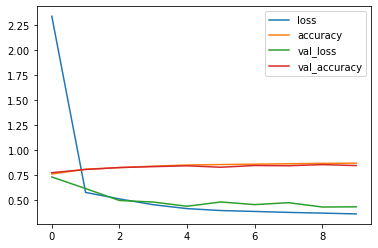

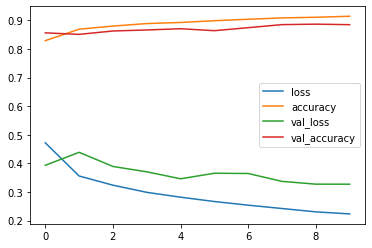

In [ ]:
# lets plot the history 
import pandas as pd
pd.DataFrame(not_norm_history.history).plot()

plt.show()
pd.DataFrame(norm_history.history).plot()


## Ideal learning rate 

In [ ]:
### Finding the ideal learning rate 


# Try fitting the model on the normalized data 

# 1. Build model 
model_2 =tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                                      tf.keras.layers.Dense(300,activation='relu'),
                                                      tf.keras.layers.Dense(200,activation='relu'),
                                                      tf.keras.layers.Dense(10,activation='softmax')])

# 2. Compile model 
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

learn_rate=tf.keras.callbacks.LearningRateScheduler(lambda epoch : 0.001 *10**(epoch/20))

# 3. Fit the model 
norm_history=model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels),callbacks=learn_rate)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4742 - accuracy: 0.8287 - val_loss: 0.4000 - val_accuracy: 0.8548
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3641 - accuracy: 0.8655 - val_loss: 0.4210 - val_accuracy: 0.8530
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3298 - accuracy: 0.8779 - val_loss: 0.3701 - val_accuracy: 0.8676
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3133 - accuracy: 0.8847 - val_loss: 0.3865 - val_accuracy: 0.8610
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3014 - accuracy: 0.8885 - val_loss: 0.3628 - val_accuracy: 0.8684
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2926 - accuracy: 0.8899 - val_loss: 0.3922 - val_accuracy: 0.8541
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2906 - accuracy: 0.8919 - val_loss: 0.3593 - val_acc

Text(0, 0.5, 'loss')

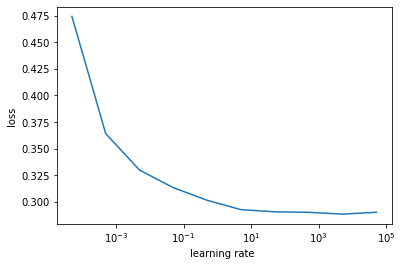

In [ ]:
# Plot the learning rate decay 

import numpy as np
import matplotlib.pyplot as plt 

lrs=0.001*(10**(tf.range(10))/20)
plt.semilogx(lrs,norm_history.history['loss'])
plt.xlabel('learning rate ')
plt.ylabel('loss')

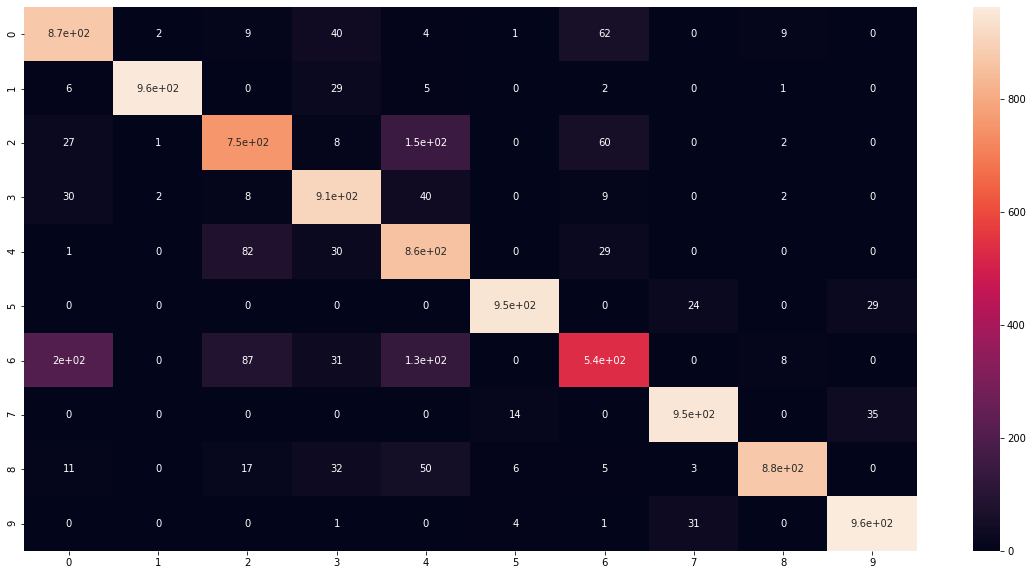

In [ ]:
# create the confusion matrix 
import seaborn as sns
y_pred=model_2.predict(test_data_norm)
cm=confusion_matrix(y_pred=y_pred.argmax(axis=1),y_true=test_labels)
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)

# What patterns in our model learning ?


In [ ]:
# Find the layers of the most recent model 
model_2.layers

In [ ]:
# Extract a particular layer 
model_2.layers[0]

In [ ]:
# get the pattern of a layer in our network
weights, biases= model_2.layers[2].get_weights()

# shapes 
weights,weights.shape

(array([[ 0.19735375, -0.01150715,  0.09542836, ..., -0.04027184,
         -0.10681015,  0.20030837],
        [-0.1496002 , -0.10396259,  0.00379054, ...,  0.16720977,
         -0.01844409, -0.03484662],
        [-0.45676777, -0.13920887,  0.16275008, ...,  0.10869266,
         -0.0888661 , -0.2536902 ],
        ...,
        [-0.09002824,  0.15700291,  0.08638831, ...,  0.01863215,
         -0.05828992, -0.34830797],
        [-0.09337472, -0.15318456, -0.01224545, ..., -0.03917489,
          0.018046  , -0.19742201],
        [-0.02991829,  0.04086852,  0.04743526, ..., -0.06068965,
          0.04019719,  0.12493175]], dtype=float32), (300, 200))

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


Every neuron has a bias vector. Each of this is paired with a weight matrix .

The bias dictates how much the patterns within the corresponding weights matrix should influence the next layer 

In [ ]:
# lets check out the bias layer 
biases,biases.shape

(array([-0.30813584, -0.22165224,  0.07455272, -0.09923605, -0.18768345,
         0.02660281, -0.0420881 ,  0.31657356, -0.26538625,  0.63737625,
         0.15934855,  0.05394549, -0.12191554, -0.20134369, -0.16928317,
         0.37582624, -0.3072354 , -0.13023734,  0.45062247, -0.12966995,
        -0.17527969, -0.26035374, -0.06389944,  0.5205357 ,  0.10496995,
         0.39530176,  0.37876144,  0.30905095, -0.05500343,  0.11669698,
         0.19707426,  0.2980197 , -0.0120415 , -0.2614937 ,  0.0187993 ,
        -0.24884264, -0.25889215,  0.5612962 ,  0.5147517 , -0.10468207,
         0.47565827, -0.32702324,  0.7087419 , -0.13814284, -0.11868099,
         0.35020486,  0.32307675, -0.16943674, -0.18519136,  0.20558731,
         0.3650095 ,  0.5905445 , -0.2177209 , -0.46027368,  0.7581847 ,
        -0.15696515, -0.26346907, -0.09444173,  0.00599707, -0.18417   ,
         0.27930066,  0.5910745 ,  0.7282576 ,  0.19289781, -0.40140006,
        -0.07331815,  0.04901543, -0.35783494,  0.4

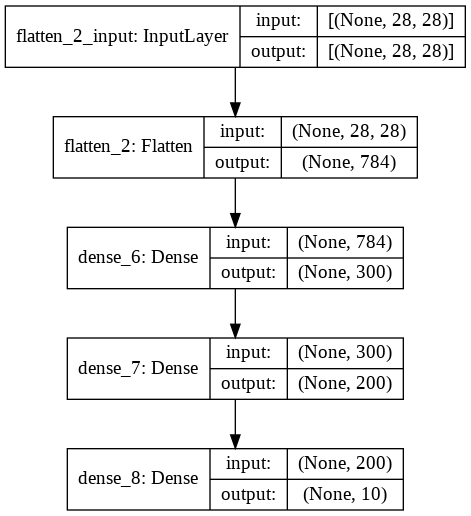

In [ ]:
# lets view our deep learning model in detail 

from tensorflow.keras.utils import plot_model 

plot_model(model_2,show_shapes=True)

In [ ]:
# Exercise
import tensorflow as tf


# Replicating the tensorflow diagram 
#1. Build the model 
model_exer=tf.keras.Sequential([
                                tf.keras.layers.Dense(6,activation='relu',input_shape=[2]),
                                tf.keras.layers.Dense(6,activation='relu'),
                                tf.keras.layers.Dense(6,activation='relu'),
                                tf.keras.layers.Dense(6,activation='relu'),
                                tf.keras.layers.Dense(6,activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')])

model_exer.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.BinaryCrossentropy(),
                   metrics=['accuracy'])

model_exer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
__________________________________________________________

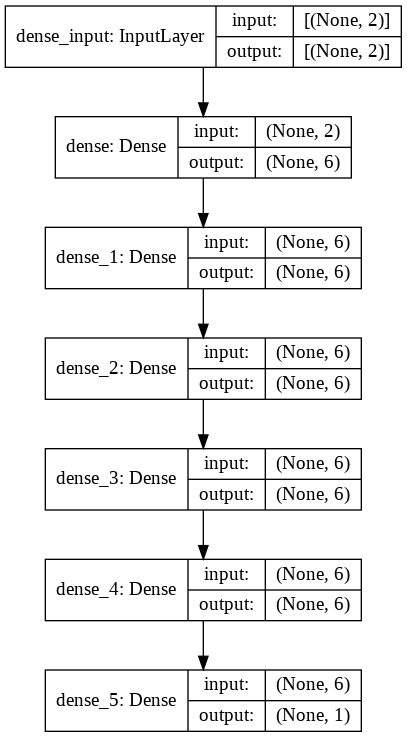

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_exer,show_shapes=True)

# Do not worry about the dimension when specifying input shape in the Dense layer and specify it in the square brackets 

In [ ]:
# 2 
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=1000, shuffle=True, noise=None, random_state=None)


In [ ]:
X=tf.constant(X)
y=tf.constant(y)

In [ ]:
X.shape,y.shape

(TensorShape([100, 2]), TensorShape([100]))

In [ ]:
X[:,1]

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([ 3.75267005e-01, -3.20172255e-01,  8.55142763e-01,  1.24732995e-01,
        8.86599306e-01,  6.40702200e-02,  3.75267005e-01,  2.46345416e-01,
        5.45534901e-01, -1.48228395e-01,  9.99486216e-01, -1.95682551e-01,
        1.24732995e-01,  5.00000000e-01,  9.95379113e-01,  9.14412623e-01,
        3.08841371e-01,  9.28244800e-03,  4.35929780e-01, -4.14412623e-01,
       -3.55142763e-01,  4.35929780e-01,  3.72122838e-01, -4.99486216e-01,
        6.48228395e-01,  4.90717552e-01, -4.95379113e-01, -4.38468422e-01,
       -4.55349012e-02,  9.38468422e-01,  5.98110530e-01, -2.81831482e-01,
       -2.40277997e-01,  4.90717552e-01,  0.00000000e+00,  2.46345416e-01,
       -4.95379113e-01,  9.87181783e-01, -4.74927912e-01,  9.99486216e-01,
        6.95682551e-01,  3.15108218e-01,  8.20172255e-01,  7.81831482e-01,
        1.27877162e-01,  9.38468422e-01, -4.99486216e-01, -1.95682551e-01,
        5.98110530e-01,  5.00000000e-01,  9.58667853

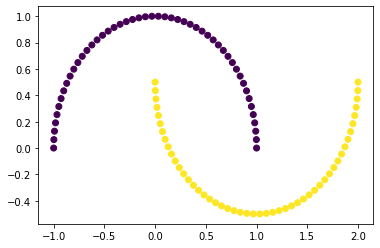

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0].numpy(),X[:,1].numpy(),c=y)

In [ ]:
X_train=X[:800,:]
y_train=y[:800]
X_test=X[800:,:]
y_test=y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# Lets Build the model 
# set random seed

tf.random.set_seed(42)

epoch_limit=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5)

# 1. Build the model 
model_exer_2=tf.keras.Sequential([tf.keras.layers.Dense(6,input_shape=[2],activation='relu'),
                                  tf.keras.layers.Dense(10,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

#2. compile the model 

model_exer_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=['accuracy'])

#3.Fit the model 
model_exer_2.fit(X_train,y_train,epochs=100,verbose=1,callbacks=[epoch_limit])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7140 - accuracy: 0.5150
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5650
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.7063
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.7600
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6328 - accuracy: 0.7763
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.8012
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.8100
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.8213
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.8338
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5607 - accuracy: 0.8375
Epoch 11/

In [ ]:
model_exer_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9150


[0.21049810945987701, 0.9150000214576721]

In [ ]:
# MNIST test dataset 

(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data(path='mnist.npz')

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

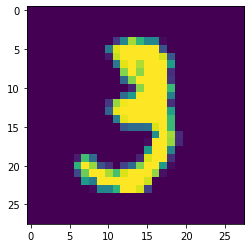

In [ ]:
import random 


plt.imshow(X_train[10])

In [ ]:
# normalize the data before feeding 
X_train[0].max(),X_train[0].min()

X_train=X_train/X_train.max()
X_test=X_test/X_test.max()

In [ ]:
import numpy as np
n_classes=len(np.unique(y_train))

In [ ]:
# Set the random seed 

tf.random.set_seed(42
                   )

epoch_rate=tf.keras.callbacks.EarlyStopping(monitor='metrics',patience=5)

# 1. Build the model 

model_mnist=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                 tf.keras.layers.Dense(100,activation='relu'),
                                 tf.keras.layers.Dense(50,activation='relu'),
                                 tf.keras.layers.Dense(n_classes,activation='softmax')])

# 2.Compile the model

model_mnist.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])

# 3. Fit the model

model_mnist.fit(X_train,y_train,epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2545 - accuracy: 0.9254
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1094 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0780 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0473 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0405 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0337 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0253 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

In [ ]:
model_mnist.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0919 - accuracy: 0.9762


[0.09185372292995453, 0.9761999845504761]

In [ ]:
# Loss function

import numpy as np

def softmax(y_arr):
  return np.exp(y_arr)/np.sum(np.exp(y_arr)) 

In [ ]:
y_prob=[0.1,0.2,0.5]

softmax(y_prob),tf.nn.softmax(y_prob)

(array([0.27800979, 0.30724834, 0.41474187]),
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.27800977, 0.30724832, 0.41474187], dtype=float32)>)